### Dependencies

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

590

### Perform API Calls 

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
temp_test = []
city_test = ['chicago', 'miami', 'london', 'xxx']
good_cities = []
for city in city_test:
    response = requests.get(query_url + city).json()
    try:
        temp_test.append(response["main"]["temp"])
        good_cities.append(city)
        print(f"{city} found. Temp appending")
    except KeyError:
        print(f"no temp for {city}")
print(response)
print(temp_test)
print(good_cities)


chicago found. Temp appending
miami found. Temp appending
london found. Temp appending
no temp for xxx
{'cod': '404', 'message': 'city not found'}
[28.99, 72.5, 45.07]
['chicago', 'miami', 'london']


In [22]:
ok_cities = []
ok_lat = []
ok_lon = []
ok_maxtemp = []
ok_mintemp = []
ok_humidity = []
ok_clouds = []
ok_wind = []
ok_country = []
ok_date = []

# temp = []
# humidity = []
# wind_speed = []
# city_list = cities
# ok_cities = []
# ok_lat = []
# country = []
# ok_lng = []
# date = []


for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ok_cities.append(response["name"])
        ok_lat.append(response["coord"]["lat"])
        ok_lon.append(response["coord"]["lon"])
        ok_maxtemp.append(response["main"]["temp_max"])
        ok_mintemp.append(response["main"]["temp_min"])
        ok_humidity.append(response["main"]["humidity"])
        ok_clouds.append(response["clouds"]["all"])
        ok_wind.append(response["wind"]["speed"])
        ok_country.append(response["sys"]["country"])
        ok_date.append(response["dt"])
   
    except KeyError:
        print(f"no temp found for {city}")
print(response)

no temp found for attawapiskat
no temp found for illoqqortoormiut
no temp found for taolanaro
no temp found for tsihombe
no temp found for rawannawi
no temp found for karkaralinsk
no temp found for ruatoria
no temp found for sentyabrskiy
no temp found for wulanhaote
no temp found for taburi
no temp found for tumannyy
no temp found for nizhneyansk
no temp found for aflu
no temp found for qabis
no temp found for ust-kamchatsk
no temp found for one hundred mile house
no temp found for palabuhanratu
no temp found for rolim de moura
no temp found for marcona
no temp found for amderma
no temp found for barbar
no temp found for kazalinsk
no temp found for kracheh
no temp found for marathopolis
no temp found for tir pol
no temp found for tambul
no temp found for chagda
no temp found for saleaula
no temp found for belushya guba
no temp found for grand river south east
no temp found for barentsburg
no temp found for warqla
no temp found for vaitupu
no temp found for mme
no temp found for samusu


In [25]:
print(len(ok_cities))
print(len(ok_lat))
print(len(ok_lon))
print(len(ok_maxtemp))
print(len(ok_mintemp))
print(len(ok_humidity))
print(len(ok_clouds))
print(len(ok_wind))
print(len(ok_country))
print(len(ok_date))

545
545
545
545
545
545
545
545
545
545


### Convert Raw Data to DataFrame 

In [33]:
weather_dict = {"City": ok_cities, "Latitude": ok_lat, "Longitude": ok_lon, "Max Temp": ok_maxtemp, 
                "Humidity": ok_humidity, "Cloudiness": ok_clouds, "Wind Speed": ok_wind, 
                "Country": ok_country, "Date": ok_date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumul,42.8000,93.4500,16.86,82,0,5.84,CN,1611711381
1,Ushuaia,-54.8000,-68.3000,39.20,75,75,19.57,AR,1611711025
2,Qaanaaq,77.4840,-69.3632,-15.84,61,0,7.27,GL,1611711108
3,Ahipara,-35.1667,173.1667,75.09,63,15,5.64,NZ,1611711108
4,Asău,46.4333,26.4000,30.99,52,100,6.69,RO,1611711108
...,...,...,...,...,...,...,...,...,...
540,Iqaluit,63.7506,-68.5145,-5.01,71,1,6.91,CA,1611711586
541,Nouadhibou,20.9310,-17.0347,64.40,77,0,16.11,MR,1611711518
542,Itaqui,-29.1253,-56.5531,75.67,88,100,10.31,BR,1611711587
543,Tromsø,69.6496,18.9570,21.00,86,0,3.44,NO,1611711587


### Inspect data and remove cities where the humidty is > 100%

In [35]:
low_hum = pd.DataFrame(weather_df[weather_df["Humidity"]< 100])
low_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumul,42.8000,93.4500,16.86,82,0,5.84,CN,1611711381
1,Ushuaia,-54.8000,-68.3000,39.20,75,75,19.57,AR,1611711025
2,Qaanaaq,77.4840,-69.3632,-15.84,61,0,7.27,GL,1611711108
3,Ahipara,-35.1667,173.1667,75.09,63,15,5.64,NZ,1611711108
4,Asău,46.4333,26.4000,30.99,52,100,6.69,RO,1611711108
...,...,...,...,...,...,...,...,...,...
540,Iqaluit,63.7506,-68.5145,-5.01,71,1,6.91,CA,1611711586
541,Nouadhibou,20.9310,-17.0347,64.40,77,0,16.11,MR,1611711518
542,Itaqui,-29.1253,-56.5531,75.67,88,100,10.31,BR,1611711587
543,Tromsø,69.6496,18.9570,21.00,86,0,3.44,NO,1611711587


## Plotting the Data 

### Latitude vs. Temperature Plot 

Text(0, 0.5, 'Temperature')

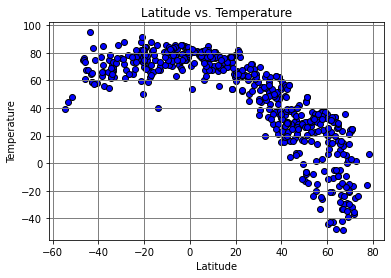

In [59]:
plot_lat = low_hum_df['Latitude']
plot_temp = low_hum_df["Max Temp"]

plt.scatter(plot_lat, plot_temp, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

### Latitude vs. Humidty Plot

Text(0, 0.5, 'Humidity')

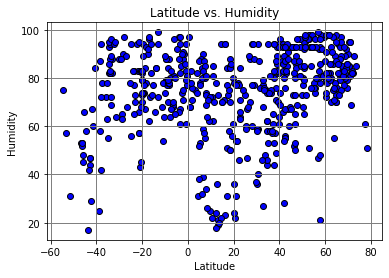

In [60]:
plot_lat = low_hum_df['Latitude']
plot_humidity = low_hum_df["Humidity"]

plt.scatter(plot_lat, plot_humidity, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Humidity')

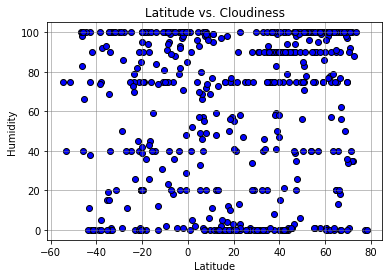

In [55]:
plot_lat = low_hum_df['Latitude']
plot_cloud = low_hum_df["Cloudiness"]

plt.scatter(plot_lat, plot_cloud, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.1)
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

###  Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Humidity')

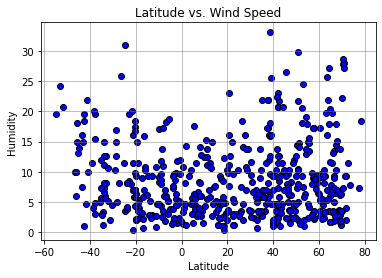

In [64]:
plot_lat = low_hum_df['Latitude']
plot_wind = low_hum_df["Wind Speed"]

plt.scatter(plot_lat, plot_wind, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Linear Regression

In [62]:
north_hem = pd.DataFrame(low_hum[low_hum["Latitude"]> 0])
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kumul,42.8000,93.4500,16.86,82,0,5.84,CN,1611711381
2,Qaanaaq,77.4840,-69.3632,-15.84,61,0,7.27,GL,1611711108
4,Asău,46.4333,26.4000,30.99,52,100,6.69,RO,1611711108
6,Vestmannaeyjar,63.4427,-20.2734,33.44,86,100,25.70,IS,1611711108
10,Thaton,16.9206,97.3714,76.10,51,0,4.45,MM,1611711273


In [65]:
north_lat = north_hem["Latitude"]
north_maxtemp = north_hem["Max Temp"]
north_humid = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

In [63]:
south_hem = pd.DataFrame(low_hum[low_hum["Latitude"]< 0])
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ushuaia,-54.8000,-68.3000,39.20,75,75,19.57,AR,1611711025
3,Ahipara,-35.1667,173.1667,75.09,63,15,5.64,NZ,1611711108
5,Mataura,-46.1927,168.8643,75.00,53,98,10.00,NZ,1611711270
8,Saint-Philippe,-21.3585,55.7679,75.20,57,0,6.91,RE,1611711109
9,Mar del Plata,-38.0023,-57.5575,71.01,94,75,4.76,AR,1611710991


In [79]:
south_lat = south_hem["Latitude"]
south_maxtemp = south_hem["Max Temp"]
south_humid = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

### Northern Hemisphere: Max Temp vs. Latitude Linear Regression 

The correlation between Latitude vs. Max Temp is -0.86


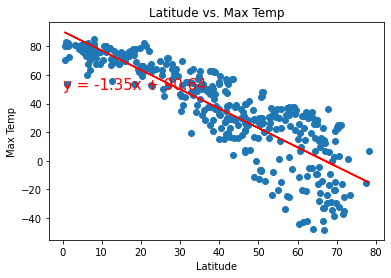

In [75]:

# north_lat = north_hem["Latitude"]
# north_maxtemp = north_hem["Max Temp"]
# north_humid = north_hem["Humidity"]
# north_cloud = north_hem["Cloudiness"]
# north_wind = north_hem["Wind Speed"]
correlation = st.pearsonr(north_lat, north_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_maxtemp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_maxtemp)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Latitude vs. Max Temp")
print(f"The correlation between Latitude vs. Max Temp is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Max Temp vs. Latitude Linear Regression 

The correlation between Southern Hemispher Latitude vs. Max Temp is 0.45


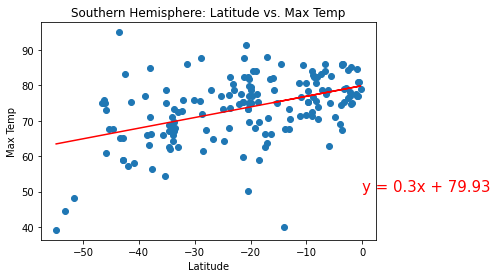

In [80]:
correlation = st.pearsonr(south_lat, south_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_maxtemp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_maxtemp)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
print(f"The correlation between Southern Hemispher Latitude vs. Max Temp is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The correlation between Latitude vs. Humidty 0.42


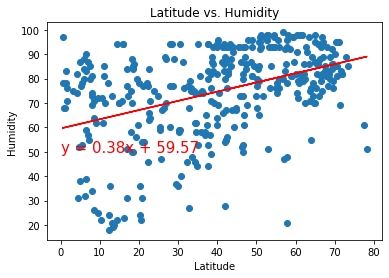

In [76]:

# north_lat = north_hem["Latitude"]
# north_maxtemp = north_hem["Max Temp"]
# north_humid = north_hem["Humidity"]
# north_cloud = north_hem["Cloudiness"]
# north_wind = north_hem["Wind Speed"]
correlation = st.pearsonr(north_lat, north_humid)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")
print(f"The correlation between Latitude vs. Humidty {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The correlation between Southern Hemisphere Latitude vs. Humidty 0.41


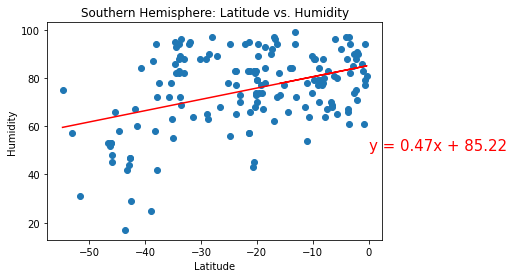

In [81]:
correlation = st.pearsonr(south_lat, south_humid)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Latitude vs. Humidity")
print(f"The correlation between Southern Hemisphere Latitude vs. Humidty {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.27


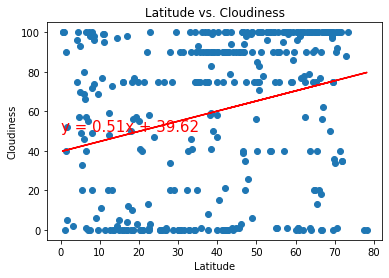

In [89]:
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.13


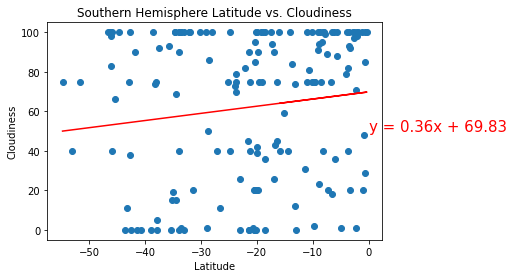

In [88]:
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is 0.18


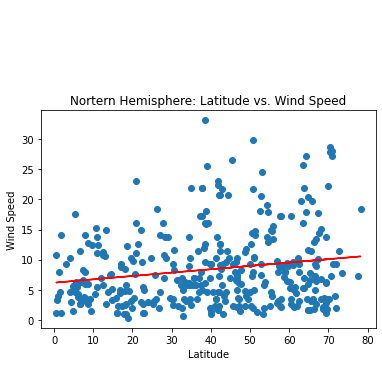

In [87]:
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Nortern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is -0.35


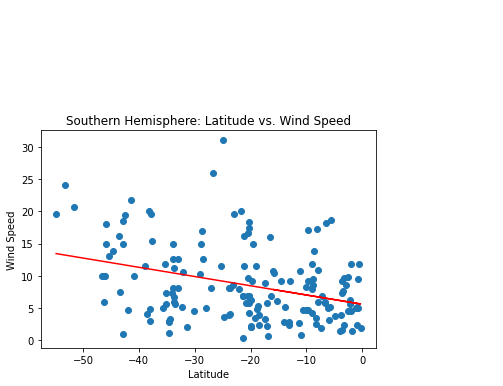

In [86]:
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()